80134624/80134624 [==============================] - 1s 0us/step
Found 4249 images belonging to 5 classes.
Found 833 images belonging to 5 classes.
Epoch 1/10
132/132 [==============================] - 1343s 10s/step - loss: 0.6599 - accuracy: 0.8610 - val_loss: 0.1118 - val_accuracy: 0.9579
Epoch 2/10
132/132 [==============================] - 129s 982ms/step - loss: 0.1539 - accuracy: 0.9421 - val_loss: 0.1132 - val_accuracy: 0.9555
Epoch 3/10
132/132 [==============================] - 128s 968ms/step - loss: 0.1279 - accuracy: 0.9530 - val_loss: 0.0832 - val_accuracy: 0.9651
Epoch 4/10
132/132 [==============================] - 130s 986ms/step - loss: 0.1017 - accuracy: 0.9656 - val_loss: 0.0844 - val_accuracy: 0.9663
Epoch 5/10
132/132 [==============================] - 132s 998ms/step - loss: 0.1021 - accuracy: 0.9613 - val_loss: 0.0657 - val_accuracy: 0.9796
Epoch 6/10
132/132 [==============================] - 126s 952ms/step - loss: 0.0862 - accuracy: 0.9675 - val_loss: 0.0701 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


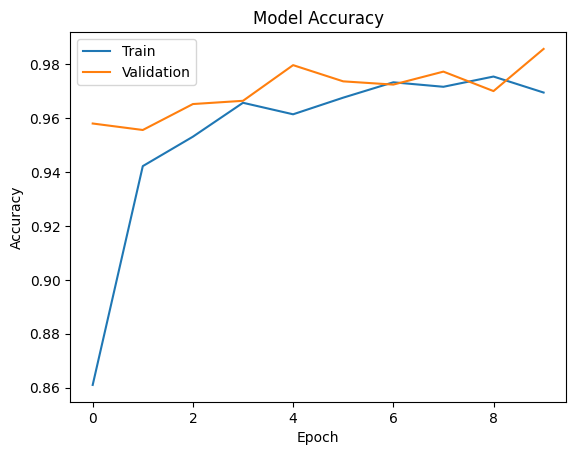

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the paths to your dataset
train_data_dir = '/content/drive/MyDrive/All fruits/Training'
validation_data_dir = '/content/drive/MyDrive/All fruits/Testing'

# Constants
img_width, img_height = 224, 224
batch_size = 32
epochs = 10
num_classes = 5  # Number of fruit classes

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Get the first convolutional layer of the pre-trained model
first_conv_layer = base_model.layers[0]

# Create a new convolutional layer with a kernel size of (3, 3) and padding of 'same'
blurring_layer = Conv2D(3, (3, 3), padding='same', activation='linear', trainable=False)

# Add the blurring layer after the first convolutional layer of the pre-trained model
base_model.layers.insert(1, blurring_layer)

# Create a new model with the blurred pre-trained VGG19 model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Freeze the layers of the pre-trained model

for layer in base_model.layers:
    layer.trainable = False


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)

# Save the model
model.save('fruit_classification_model.h5')

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()





1/1 [==============================] - 7s 7s/step
Predicted fruit: Apple, Confidence: 0.99


(-0.5, 223.5, 223.5, -0.5)

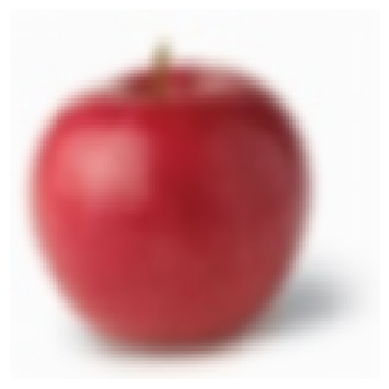

In [ ]:
# Define the function to make predictions
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
loaded_model = load_model('/content/drive/MyDrive/All fruits/fruit-final-blur.h5')
def predict_fruit(model, img_path, class_labels):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    class_idx = np.argmax(predictions)
    predicted_class = class_labels[class_idx]
    confidence = predictions[0][class_idx]
    return predicted_class, confidence

# Define class labels
class_labels = {
    0: 'Apple',
    1: 'Banana',
    2: 'Mango',
    3: 'Orange',
    4: 'Pineapple'
}

# Example usage
img_path = '/content/apple-blur-1.jpg'  # Replace with the path to your new test image
predicted_class, confidence = predict_fruit(loaded_model, img_path, class_labels)
print(f'Predicted fruit: {predicted_class}, Confidence: {confidence:.2f}')
input_image = image.load_img(img_path,target_size=(224,224))
plt.imshow(input_image)
plt.axis('off')
